In [1]:
from model import load_tf_datasets, build_model, compile_train_model, evaluate_model

# Load Dataset

In [2]:
train_ds, val_ds, test_ds = load_tf_datasets(split_paradigm="70_20_10")

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
n_samples: 50844
n_batches: 1589
n_classes: 10
Classes: ['Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold', 'Mosaic_virus', 'Septoria_leaf_spot', 'Spider_mites', 'Target_Spot', 'Yellow_Leaf_Curl_Virus']
Image Batch Shape: (32, 224, 224, 3)
Label Batch Shape: (32, 10)

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
n_samples: 3632
n_batches: 114
n_classes: 10
Classes: ['Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold', 'Mosaic_virus', 'Septoria_leaf_spot', 'Spider_mites', 'Target_Spot', 'Yellow_Leaf_Curl_Virus']
Image Batch Shape: (32, 224, 224, 3)
Label Batch Shape: (32, 10)

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
n_samples: 1817
n_batches: 57
n_classes: 10
Classes: ['Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold', 'Mosaic_virus', 'Septoria_leaf_spot', 'Spider_mites', 'Target_Spot', 'Yellow_Leaf_Curl_Virus']


# Model

## Architecture

In [3]:
model = build_model(model_name="EfficientNetB0")

Model: "EfficientNetB0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,427,565 (20.70 MB)

 Trainable params: 1,377,994 (5.26 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

## Training

Epoch 1/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 1001s 623ms/step - accuracy: 0.8026 - loss: 0.0797 - val_accuracy: 0.9202 - val_loss: 0.0215 - learning_rate: 0.0010
Epoch 2/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 1077s 673ms/step - accuracy: 0.9252 - loss: 0.0235 - val_accuracy: 0.9493 - val_loss: 0.0155 - learning_rate: 0.0010
Epoch 3/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 915s 574ms/step - accuracy: 0.9409 - loss: 0.0182 - val_accuracy: 0.9551 - val_loss: 0.0129 - learning_rate: 0.0010
Epoch 4/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 881s 551ms/step - accuracy: 0.9544 - loss: 0.0130 - val_accuracy: 0.9559 - val_loss: 0.0135 - learning_rate: 0.0010
Epoch 5/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 937s 587ms/step - accuracy: 0.9617 - loss: 0.0114 - val_accuracy: 0.9667 - val_loss: 0.0134 - learning_rate: 0.0010
Epoch 6/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 1039s 650ms/step - accuracy: 0.9644 - loss: 0.0102 - val_accuracy: 0.9587 - val_loss: 0.0127 - learning_rate: 0.0010
Epoch 7/50
1589/1589 ━━━━━━━━━━━━━━━━━━━━ 1031s 6

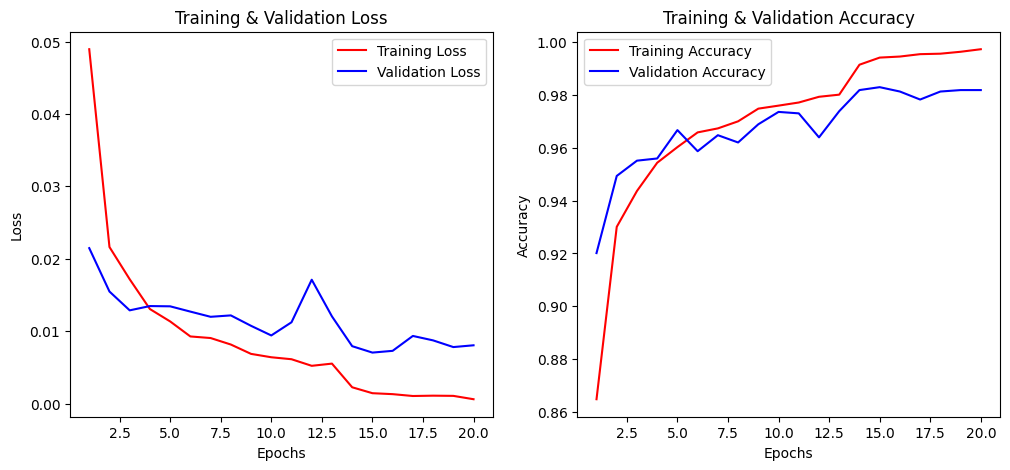

In [4]:
model = compile_train_model(model, train_ds, val_ds)

## Evaluation

57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 496ms/step - accuracy: 0.9863 - loss: 0.0054
Test Accuracy: 0.9851
Test Loss: 0.0056
57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 499ms/step


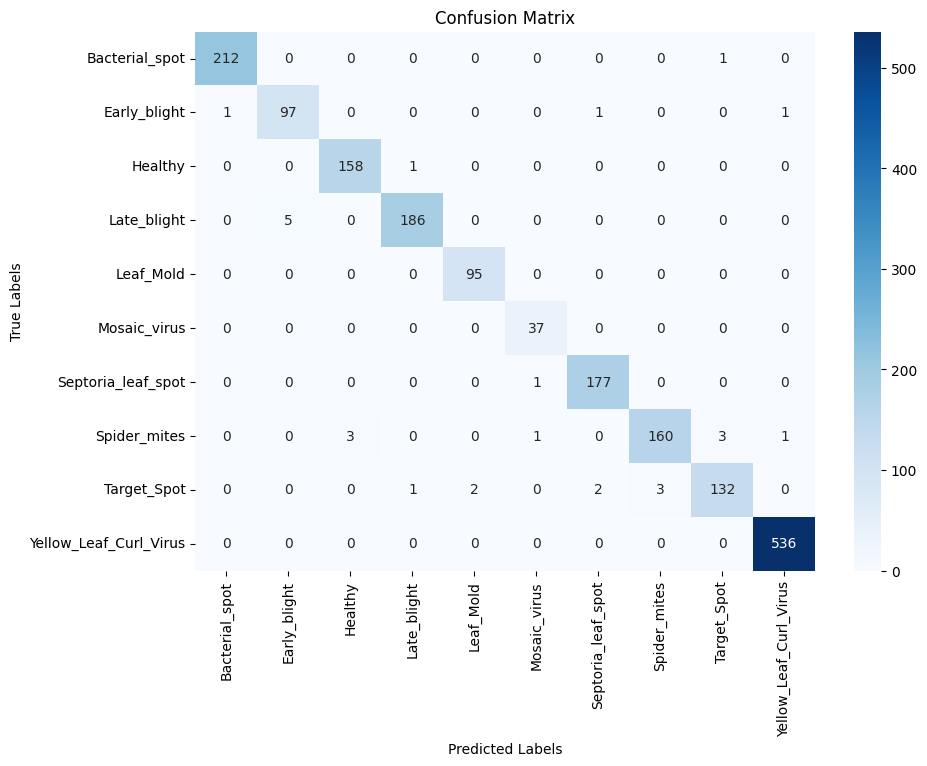

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       0.95      0.97      0.96       100
           2       0.98      0.99      0.99       159
           3       0.99      0.97      0.98       191
           4       0.98      1.00      0.99        95
           5       0.95      1.00      0.97        37
           6       0.98      0.99      0.99       178
           7       0.98      0.95      0.97       168
           8       0.97      0.94      0.96       140
           9       1.00      1.00      1.00       536

    accuracy                           0.99      1817
   macro avg       0.98      0.98      0.98      1817
weighted avg       0.99      0.99      0.99      1817



In [5]:
evaluate_model(model, test_ds)